In [7]:
%load_ext autoreload
%autoreload 2
%tb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


No traceback available to show.


In [9]:
import networkx as nx

from graph2plan.dcel.create import create_embedding
from graph2plan.dual.create_rectangle import  calculate_x_domains
from graph2plan.dual.check import check_correct_n_faces_in_edge_face_dict, check_is_source_target_graph, check_is_correctly_oriented_source_target_graph
from graph2plan.dual.create_dual import create_dual, get_node_by_face, prep_dual
from graph2plan.dual.create_rectangle import find_vertex_faces
from graph2plan.dual.examples import embedded_kant_G1, kant_G2
from copy import deepcopy

from graph2plan.dual.interfaces import DualVertex


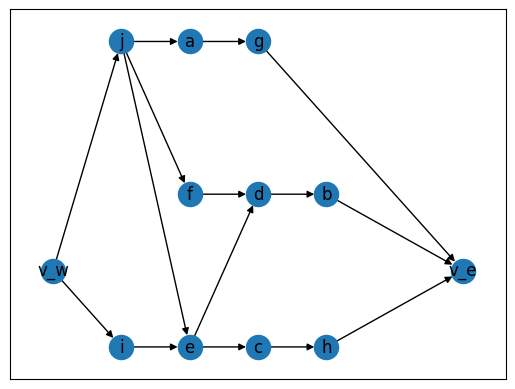

In [12]:
G, pos = kant_G2()
nx.draw_networkx(G, pos)

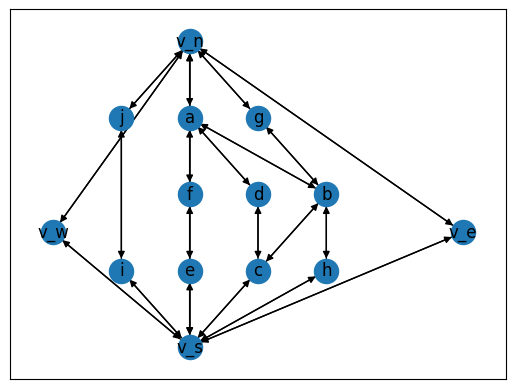

In [13]:
PG, pos, de = embedded_kant_G1()
nx.draw_networkx(PG.to_directed(), pos)

In [19]:
list(PG.neighbors_cw_order("v_n"))

['v_e', 'g', 'a', 'j', 'v_w', 'v_s']

In [15]:
list(PG.neighbors_cw_order("v_s"))

['v_n', 'v_w', 'i', 'e', 'c', 'h', 'v_e']

In [17]:
list(PG.neighbors_cw_order("v_w"))

['v_s', 'v_n']

In [18]:
list(PG.neighbors_cw_order("v_e"))

['v_n', 'v_s']

In [16]:
list(PG.neighbors_cw_order("v_n"))

['v_e', 'g', 'a', 'j', 'v_w', 'v_s']

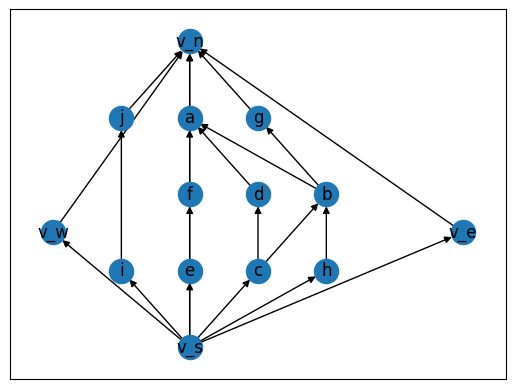

In [4]:
dpg = nx.DiGraph(PG.to_directed().edge_subgraph(de))
nx.draw_networkx(dpg, pos)

In [5]:
check_is_source_target_graph(dpg)

('v_s', 'v_n')

==>> vertex[0]: v_f18
==>> vertex[0]: v_f17


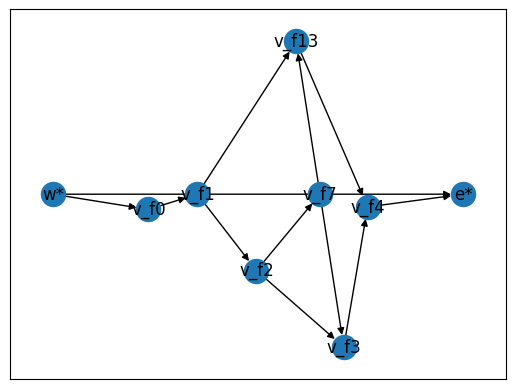

In [6]:
ef = prep_dual(PG, de)
ef.keys()
dual_graph, dpos = create_dual(ef, pos)
# dual graph should be st 


In [10]:
source = "v_s"
target = "v_n"
ef[source, target]

FacePair(left=Face(vertices=['v_n', 'v_s', 'v_e']), right=Face(vertices=['v_s', 'v_n', 'v_w']))

In [9]:
check_is_correctly_oriented_source_target_graph(dual_graph)

AssertionError: 

In [7]:
check_is_source_target_graph(dual_graph, show=True)

==>> sources: ['e*']
==>> targets: ['w*']


In [44]:
check_correct_n_faces_in_edge_face_dict(ef)

In [34]:
cnt = Counter()

for pair in ef.values():
    for face in pair:
        cnt[face]+=1
        

In [38]:
cnt2 = Counter()

for pair in ef.keys():
    for vertex in pair:
        cnt2[vertex]+=1
        

In [41]:
len(ef)

21

In [40]:
len(cnt2)

14

In [36]:
len(cnt)

9

In [33]:
frozenset([1,2,3,4]) == frozenset([1,3,2,4])

True

In [32]:
hash(frozenset([1,2,3,4,2,2]))

5575258175646371796

In [18]:
len(ef)

21

In [30]:
calculate_x_domains(dual_graph, PG, de)

==>> D1: 8
==>> vertex[0]: v_f0
==>> vertex[0]: v_f1
==>> vertex[0]: v_f1
==>> vertex[0]: v_f2
==>> vertex[0]: v_f2
==>> vertex[0]: v_f3
==>> vertex[0]: v_f3
==>> vertex[0]: v_f4
==>> vertex[0]: v_f0
==>> vertex[0]: v_f1
==>> vertex[0]: v_f1
==>> vertex[0]: v_f2
==>> vertex[0]: v_f2
==>> vertex[0]: v_f7
==>> vertex[0]: v_f7
==>> vertex[0]: v_f4
==>> vertex[0]: v_f1
==>> vertex[0]: v_f13
==>> vertex[0]: v_f13
==>> vertex[0]: v_f4
==>> vertex[0]: v_f4
==>> vertex[0]: e*
==>> vertex[0]: w*
==>> vertex[0]: v_f0
==>> vertex_distances: {'i': VertexDomain(x_min=2, x_max=3), 'e': VertexDomain(x_min=3, x_max=4), 'c': VertexDomain(x_min=4, x_max=6), 'h': VertexDomain(x_min=6, x_max=7), 'j': VertexDomain(x_min=2, x_max=3), 'f': VertexDomain(x_min=3, x_max=4), 'd': VertexDomain(x_min=4, x_max=5), 'b': VertexDomain(x_min=5, x_max=7), 'a': VertexDomain(x_min=3, x_max=6), 'g': VertexDomain(x_min=6, x_max=7), 'v_e': VertexDomain(x_min=7, x_max=8), 'v_w': VertexDomain(x_min=1, x_max=2)}


In [27]:
get_node_by_face(dual_graph, la)
get_node_by_face(dual_graph, ra)

==>> vertex[0]: v_f1
==>> vertex[0]: v_f13


'v_f13'

In [13]:
dg = deepcopy(DG)
source = "w*"
target = "e*"
dg.remove_edge(source, target)

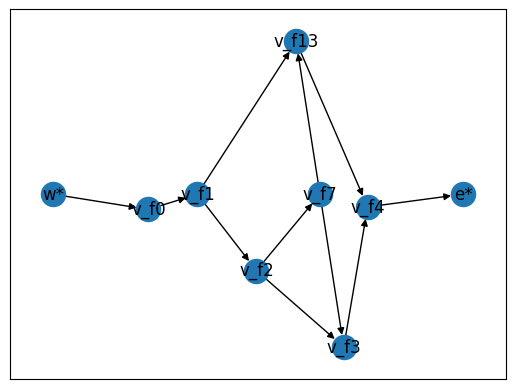

In [14]:
nx.draw_networkx(dg, dpos)

In [17]:
dem = create_embedding(dg, dpos)
dem

In [18]:
dem.check_structure()

[8, 8, 7, 6, 2]


In [15]:
source = "w*"
target = "e*"
list(nx.all_simple_paths(DG, source, target))

[['w*', 'v_f0', 'v_f1', 'v_f2', 'v_f3', 'v_f4', 'e*'],
 ['w*', 'v_f0', 'v_f1', 'v_f2', 'v_f7', 'v_f3', 'v_f4', 'e*'],
 ['w*', 'v_f0', 'v_f1', 'v_f2', 'v_f7', 'v_f13', 'v_f4', 'e*'],
 ['w*', 'v_f0', 'v_f1', 'v_f13', 'v_f4', 'e*'],
 ['w*', 'e*']]